# NBA Project for predicting Hall of Famers Based Off Career Stats

## The following members were all contributers to this notebook
### Hayden Johnson, Wil Dotson, and Lorin Helfenstein

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score

- #### Reading in the players and stats CSVs

In [3]:
players = pd.read_csv('Data/Players.csv')

In [4]:
stats = pd.read_csv('Data/Seasons_stats.csv')

- #### Dropping the Unnamed column from the dataframe

In [5]:
players = players.drop(columns= ['Unnamed: 0'], axis=1)

In [6]:
stats = stats.drop(columns= ['Unnamed: 0'], axis=1)

- #### Checking for the unique number of players in the stats dataframe to determine how many individual players we have in the dataset

In [7]:
len(stats.Player.unique())

3922

- #### Checking the attributes of the stats dataset

In [8]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    24624 non-null  float64
 1   Player  24624 non-null  object 
 2   Pos     24624 non-null  object 
 3   Age     24616 non-null  float64
 4   Tm      24624 non-null  object 
 5   G       24624 non-null  float64
 6   GS      18233 non-null  float64
 7   MP      24138 non-null  float64
 8   PER     24101 non-null  float64
 9   TS%     24538 non-null  float64
 10  3PAr    18839 non-null  float64
 11  FTr     24525 non-null  float64
 12  ORB%    20792 non-null  float64
 13  DRB%    20792 non-null  float64
 14  TRB%    21571 non-null  float64
 15  AST%    22555 non-null  float64
 16  STL%    20792 non-null  float64
 17  BLK%    20792 non-null  float64
 18  TOV%    19582 non-null  float64
 19  USG%    19640 non-null  float64
 20  blanl   0 non-null      float64
 21  OWS     24585 non-null  float64
 22

### This Section is adding new features to the dataset including MVPs, Team championships, and Finals MVPs

- #### This is a list of the players in the dataset who have won a MVP during their career, and below is a function that was created in order to add a column in for each time the player won the MVP

In [9]:
mvp_players = {'Bob Pettit*': [1956, 1959],
                  'Bob Cousy*': [1957],
                  'Bill Russell*': [1958, 1961, 1962, 1963, 1965],
                  'Wilt Chamberlain*': [1960, 1966, 1967, 1968],
                  'Oscar Robertson*': [1964],
                  'Wes Unseld*': [1969],
                  'Willis Reed*': [1970],
                  'Kareem Abdul-Jabbar*': [1971, 1972, 1974, 1976, 1977, 1980],
                  'Dave Cowens*': [1973],
                  'Bob McAdoo*': [1975],
                  'Bill Walton*': [1978],
                  'Moses Malone*': [1979, 1982, 1983],
                  'Julius Erving*': [1981],
                  'Larry Bird*': [1984, 1985, 1986],
                  'Magic Johnson*': [1987, 1989, 1990],
                  'Michael Jordan*': [1988, 1991, 1992, 1996, 1998],
                  'Charles Barkley*': [1993],
                  'Hakeem Olajuwon*': [1994],
                  'David Robinson*': [1995],
                  'Karl Malone*': [1997, 1999],
                  'Shaquille O\'Neal*': [2000],
                  'Allen Iverson*': [2001],
                  'Tim Duncan': [2002, 2003],
                  'Kevin Garnett': [2004],
                  'Steve Nash': [2005, 2006],
                  'Dirk Nowitzki': [2007],
                  'Kobe Bryant': [2008],
                  'LeBron James': [2009, 2010, 2012, 2013],
                  'Derrick Rose': [2011],
                  'Kevin Durant': [2014],
                  'Stephen Curry': [2015, 2016],
                  'Russell Westbrook': [2017],
                  'James Harden': [2018]}

In [10]:
stats['MVP'] = 0
for i, row in stats.iterrows():
    for k, v in mvp_players.items():
        for year in v:
            if row['Player'] != k:
                break
            elif(row['Year'] == year) & (row['Player'] == k):
                stats.loc[i, 'MVP'] = 1
                break

- #### This is a list of all of the teams that won Championships from 1947 to 2018 and a function below that will take each team that won a championship and let each player that was on that team that year have credit for that championship, the column will be called 'rings'

In [11]:
teams_champions = {'BOS': [1957, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1968, 1969, 1974, 1976, 1981, 1984, 1986, 2008],
                  'LAL': [1972, 1980, 1982, 1985, 1987, 1988, 2000, 2001, 2002, 2009, 2010],
                  'MNL': [1949, 1950, 1952, 1953, 1954],
                  'CHI': [1991, 1992, 1993, 1996, 1997, 1998],
                  'GSW': [1975, 2015, 2017, 2018],
                  'PHW': [1947, 1956],
                  'SAS': [1999, 2003, 2005, 2007, 2014],
                  'DET': [1989, 1990, 2004],
                  'MIA': [2006, 2012, 2013],
                  'PHI': [1967, 1983],
                  'SYR': [1955],
                  'HOU': [1994, 1995],
                  'NYK': [1970, 1973],
                  'STL': [1958],
                  'BLB': [1948],
                  'CLE': [2016],
                  'DAL': [2011],
                  'MIL': [1971],
                  'SEA': [1979],
                  'POR': [1977],
                  'ROC': [1951],
                  'WSB': [1978]}

In [12]:
stats['rings'] = 0
for i, row in stats.iterrows():
    for k, v in teams_champions.items():
        for year in v:
            if row['Tm'] != k:
                break
            elif(row['Year'] == year) & (row['Tm'] == k):
                stats.loc[i, 'rings'] = 1
                break

- #### This the list of all of the players that have won a Finals MVP, so not only have they won a championship but they are also the finals mvp / and below this dictionary is a function that will create a column for the number of times each player has won a finals mvp

In [13]:
finals_mvp = {'Jerry West*': [1969],
               'Willis Reed*': [1970, 1973],
               'Micheal Jordan*': [1991, 1992, 1993, 1996, 1997, 1998],
               'Lebron James*': [2012, 2013, 2016],
                 'Magic Johnson*': [1980, 1982, 1987],
                 'Shaquille O\'Neal*': [2000, 2001, 2002],
                 'Tim Duncan': [1999, 2003, 2005],
                 'Kareem Abdul-Jabbar*': [1971, 1985],
                 'Larry Bird*': [1984, 1986],
                 'Hakeem Olajuwon*': [1994, 1995],
                 'Kobe Bryant': [2009, 2010],
                 'Kevin Durant': [2017, 2018],
                 'Kawhi Leonard': [2014], 
                 'Wilt Chamberlain*': [1972],
                 'John Havlicek*': [1974],
                 'Rick Barry': [1975], 
                 'Jo Jo White*': [1976], 
                 'Bill Walton*': [1977],
                 'Wes Unseld*': [1978],
                 'Dennis Johnson*': [1979],
                 'Cedric Maxwell': [1981], 
                 'Moses Malone*': [1983],
                 'James Worthy*': [1988],
                 'Joe Dumars*': [1989],
                 'Isiah Thomas*': [1990],
                 'Chauncey Billups': [2004],
                 'Dwayne Wade': [2006],
                 'Tony Parker': [2007],
                 'Paul Pierce': [2008],
                 'Dirk Nowitzki': [2011],
                 'Andre Iguodala': [2015]}

In [14]:
stats['finals_mvp'] = 0
for i, row in stats.iterrows():
    for k, v in finals_mvp.items():
        for year in v:
            if row['Player'] != k:
                break
            elif(row['Year'] == year) & (row['Player'] == k):
                stats.loc[i, 'finals_mvp'] = 1
                break

## This portion of my notebook is where I manually used multiple groupby functions to create a career totals dataframe for all of the players in the dataset

- #### Here is where I have created a column for seasons, positions, and teams for each player using simplistic groupby functions and simply copying one column from the previous dataframe

In [15]:
totals = stats.groupby('Player').count()['Year']
totals = pd.DataFrame(totals)
totals.reset_index(inplace=True)

In [16]:
totals['Seasons'] = totals['Year']
totals = totals.drop(columns=['Year'], axis=1)

In [17]:
totals['position'] = stats.Pos

In [18]:
totals.columns = totals.columns.str.lower()

In [19]:
totals['team'] = stats.Tm

- #### Here is where I begin using the same steps for each column taking the sum of columns that need to be added together and the mean of the columns that need to be averaged in order to get the columns that we desired in our dataset
- #### Which are as follows: 'games_played', 'player_efficiency_rating', 'shooting_percent', 'field_goals', 'fg_percent', '3p_made', '3p_percentage', '2p_made', '2p_percentage', 'free_throws_made', 'ft_percentage', 'offensive_rebounds', 'defensive_rebounds', 'total_rebounds', 'total_assists', 'total_steals', 'total_blocks', 'total_turnovers', 'total_personal_fouls', 'total_points', 'total_mvp', 'total_rings', and 'total_finals_mvp'.

In [20]:
games = stats.groupby('Player').sum()['G']
games = pd.DataFrame(games)
games.reset_index(inplace=True)
games.columns = games.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(games, totals, how='left', on='player')
totals.rename(columns= {'g': 'games_played'}, inplace=True)


In [21]:
player_efficiency = stats.groupby('Player').mean()['PER']
player_efficiency = pd.DataFrame(player_efficiency)
player_efficiency.reset_index(inplace=True)
player_efficiency.columns = player_efficiency.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(player_efficiency, totals, how='left', on='player')
totals.rename(columns = {'per': 'player_efficiency_rating'}, inplace=True)


In [22]:
shooting_percent = stats.groupby('Player').mean()['TS%']
shooting_percent = pd.DataFrame(shooting_percent)
shooting_percent.reset_index(inplace=True)
shooting_percent.columns = shooting_percent.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(shooting_percent, totals, how='left', on='player')
totals.rename(columns = {'ts%': 'shooting_percent'}, inplace=True)


In [23]:
field_goals = stats.groupby('Player').sum()['FG']
field_goals = pd.DataFrame(field_goals)
field_goals.reset_index(inplace=True)
field_goals.columns = field_goals.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(field_goals, totals, how='left', on='player')
totals.rename(columns = {'fg': 'field_goals'}, inplace=True)


In [24]:
fg_percent = stats.groupby('Player').mean()['FG%']
fg_percent = pd.DataFrame(fg_percent)
fg_percent.reset_index(inplace=True)
fg_percent.columns = fg_percent.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(fg_percent, totals, how='left', on='player')
totals.rename(columns = {'fg%': 'fg_percent'}, inplace=True)


In [25]:
three_p_made = stats.groupby('Player').sum()['3P']
three_p_made = pd.DataFrame(three_p_made)
three_p_made.reset_index(inplace=True)
three_p_made.columns = three_p_made.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(three_p_made, totals, how='left', on='player')
totals.rename(columns = {'3p': '3p_made'}, inplace=True)


In [26]:
three_p_per = stats.groupby('Player').mean()['3P%']
three_p_per = pd.DataFrame(three_p_per)
three_p_per.reset_index(inplace=True)
three_p_per.columns = three_p_per.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(three_p_per, totals, how='left', on='player')
totals.rename(columns = {'3p%': '3p_percentage'}, inplace=True)


In [27]:
two_p_made = stats.groupby('Player').sum()['2P']
two_p_made = pd.DataFrame(two_p_made)
two_p_made.reset_index(inplace=True)
two_p_made.columns = two_p_made.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(two_p_made, totals, how='left', on='player')
totals.rename(columns = {'2p': '2p_made'}, inplace=True)


In [28]:
two_p_per = stats.groupby('Player').mean()['2P%']
two_p_per = pd.DataFrame(two_p_per)
two_p_per.reset_index(inplace=True)
two_p_per.columns = two_p_per.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(two_p_per, totals, how='left', on='player')
totals.rename(columns = {'2p%': '2p_percentage'}, inplace=True)


In [29]:
free_throws_made = stats.groupby('Player').sum()['FT']
free_throws_made = pd.DataFrame(free_throws_made)
free_throws_made.reset_index(inplace=True)
free_throws_made.columns = free_throws_made.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(free_throws_made, totals, how='left', on='player')
totals.rename(columns = {'ft': 'free_throws_made'}, inplace=True)


In [30]:
free_throw_per = stats.groupby('Player').mean()['FT%']
free_throw_per = pd.DataFrame(free_throw_per)
free_throw_per.reset_index(inplace=True)
free_throw_per.columns = free_throw_per.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(free_throw_per, totals, how='left', on='player')
totals.rename(columns = {'ft%': 'ft_percentage'}, inplace=True)


In [31]:
offensive_rebounds = stats.groupby('Player').sum()['ORB']
offensive_rebounds = pd.DataFrame(offensive_rebounds)
offensive_rebounds.reset_index(inplace=True)
offensive_rebounds.columns = offensive_rebounds.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(offensive_rebounds, totals, how='left', on='player')
totals.rename(columns = {'orb': 'offensive_rebounds'}, inplace=True)


In [32]:
defensive_rebounds = stats.groupby('Player').sum()['DRB']
defensive_rebounds = pd.DataFrame(defensive_rebounds)
defensive_rebounds.reset_index(inplace=True)
defensive_rebounds.columns = defensive_rebounds.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(defensive_rebounds, totals, how='left', on='player')
totals.rename(columns = {'drb': 'defensive_rebounds'}, inplace=True)


In [33]:
total_rebounds = stats.groupby('Player').sum()['TRB']
total_rebounds = pd.DataFrame(total_rebounds)
total_rebounds.reset_index(inplace=True)
total_rebounds.columns = total_rebounds.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(total_rebounds, totals, how='left', on='player')
totals.rename(columns = {'trb': 'total_rebounds'}, inplace=True)


In [34]:
total_assists = stats.groupby('Player').sum()['AST']
total_assists = pd.DataFrame(total_assists)
total_assists.reset_index(inplace=True)
total_assists.columns = total_assists.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(total_assists, totals, how='left', on='player')
totals.rename(columns = {'ast': 'total_assists'}, inplace=True)


In [35]:
total_steals = stats.groupby('Player').sum()['STL']
total_steals = pd.DataFrame(total_steals)
total_steals.reset_index(inplace=True)
total_steals.columns = total_steals.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(total_steals, totals, how='left', on='player')
totals.rename(columns = {'stl': 'total_steals'}, inplace=True)


In [36]:
total_blocks = stats.groupby('Player').sum()['BLK']
total_blocks = pd.DataFrame(total_blocks)
total_blocks.reset_index(inplace=True)
total_blocks.columns = total_blocks.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(total_blocks, totals, how='left', on='player')
totals.rename(columns = {'blk': 'total_blocks'}, inplace=True)


In [37]:
total_turnovers = stats.groupby('Player').sum()['TOV']
total_turnovers = pd.DataFrame(total_turnovers)
total_turnovers.reset_index(inplace=True)
total_turnovers.columns = total_turnovers.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(total_turnovers, totals, how='left', on='player')
totals.rename(columns = {'tov': 'total_turnovers'}, inplace=True)


In [38]:
total_personal_fouls = stats.groupby('Player').sum()['PF']
total_personal_fouls = pd.DataFrame(total_personal_fouls)
total_personal_fouls.reset_index(inplace=True)
total_personal_fouls.columns = total_personal_fouls.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(total_personal_fouls, totals, how='left', on='player')
totals.rename(columns = {'pf': 'total_personal_fouls'}, inplace=True)


In [39]:
total_points = stats.groupby('Player').sum()['PTS']
total_points = pd.DataFrame(total_points)
total_points.reset_index(inplace=True)
total_points.columns = total_points.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(total_points, totals, how='left', on='player')
totals.rename(columns = {'pts': 'total_points'}, inplace=True)


In [40]:
total_mvp = stats.groupby('Player').sum()['MVP']
total_mvp = pd.DataFrame(total_mvp)
total_mvp.reset_index(inplace=True)
total_mvp.columns = total_mvp.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(total_mvp, totals, how='left', on='player')
totals.rename(columns = {'MVP': 'total_mvp'}, inplace=True)


In [41]:
total_rings = stats.groupby('Player').sum()['rings']
total_rings = pd.DataFrame(total_rings)
total_rings.reset_index(inplace=True)
total_rings.columns = total_rings.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(total_rings, totals, how='left', on='player')
totals.rename(columns = {'rings': 'total_rings'}, inplace=True)


In [42]:
total_finals_mvp = stats.groupby('Player').sum()['finals_mvp']
total_finals_mvp = pd.DataFrame(total_finals_mvp)
total_finals_mvp.reset_index(inplace=True)
total_finals_mvp.columns = total_finals_mvp.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(total_finals_mvp, totals, how='left', on='player')
totals.rename(columns = {'finals_mvp': 'total_finals_mvp'}, inplace=True)


## Here after deliberating with my team we narrowed down the dataset to players who have played two full seasons or more and renamed the dataset to "hall_of_fame" which is the final dataframe we will be working with

In [43]:
hall_of_fame = totals[totals.games_played >= 164]

- #### Here is a function that was created in order to have each player that is a hall of fame be returned with a 1 if they are in the hall of fame and a 0 if they are not

In [44]:
list_of_hall_of_famers = []
for i, row in hall_of_fame.iterrows():
    if '*' in row['player']:
        list_of_hall_of_famers.append(row['player'])
list_of_hall_of_famers = list(set(list_of_hall_of_famers))

In [45]:
def is_hall_of_famer(x):
    if '*' in x:
        return 1
    else:
        return 0

In [46]:
hall_of_fame['HOF'] = hall_of_fame['player'].apply(is_hall_of_famer)

<ipython-input-46-3cbc13a66797>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hall_of_fame['HOF'] = hall_of_fame['player'].apply(is_hall_of_famer)


In [47]:
hall_of_fame = hall_of_fame.set_index('player')

- #### Above I set the players names to the index of the dataframe so that we can still access the players names but and we dont lose them in our dataset when we run the train_test_split 
- #### Below I have run a .corr() function to look at the most correlated values to a player reaching the hall of fame

In [48]:
hall_of_fame.corr()['HOF'].map(abs).sort_values(ascending=False)

HOF                         1.000000
free_throws_made            0.469877
2p_made                     0.443314
total_points                0.413747
field_goals                 0.409497
total_rebounds              0.379603
player_efficiency_rating    0.376964
total_rings                 0.334376
total_personal_fouls        0.307770
mvp                         0.289431
total_assists               0.280950
total_finals_mvp            0.250688
games_played                0.215158
total_blocks                0.131520
defensive_rebounds          0.111382
offensive_rebounds          0.108104
seasons                     0.102158
total_turnovers             0.092802
total_steals                0.085595
ft_percentage               0.078167
fg_percent                  0.076635
shooting_percent            0.072490
3p_made                     0.055085
2p_percentage               0.025016
3p_percentage               0.019597
Name: HOF, dtype: float64

## Here I am creating new categories that can be used for new comparison to new players for testing my models

- #### the list of the columns that I am creating are as follows: 'points/game', 'fouls/game', 'turnovers/game', 'blocks/game', 'steals/game', 'assists/game', 'rebounds/game', 'offensive_reb/game', and 'defensive_reb/game'

In [49]:
hall_of_fame['points/game'] = hall_of_fame['total_points']/hall_of_fame['games_played']



In [50]:
hall_of_fame['fouls/game'] = hall_of_fame['total_personal_fouls']/hall_of_fame['games_played']






In [51]:
hall_of_fame['turnovers/game'] = hall_of_fame['total_turnovers']/hall_of_fame['games_played']





In [52]:
hall_of_fame['blocks/game'] = hall_of_fame['total_blocks']/hall_of_fame['games_played']




In [53]:
hall_of_fame['steals/game'] = hall_of_fame['total_steals']/hall_of_fame['games_played']




In [54]:
hall_of_fame['assists/game'] = hall_of_fame['total_assists']/hall_of_fame['games_played']




In [55]:
hall_of_fame['rebounds/game'] = hall_of_fame['total_rebounds']/hall_of_fame['games_played']




In [56]:
hall_of_fame['offensive_reb/game'] = hall_of_fame['offensive_rebounds']/hall_of_fame['games_played']




In [57]:
hall_of_fame['defensive_reb/game'] = hall_of_fame['defensive_rebounds']/hall_of_fame['games_played']




#### Here I am running another .corr() function to look at the correlation of getting into the hall of fame with the new columns that I have created

In [58]:
hall_of_fame.corr()['HOF'].map(abs).sort_values(ascending=False)

HOF                         1.000000
free_throws_made            0.469877
2p_made                     0.443314
points/game                 0.426059
total_points                0.413747
field_goals                 0.409497
total_rebounds              0.379603
player_efficiency_rating    0.376964
rebounds/game               0.354323
total_rings                 0.334376
total_personal_fouls        0.307770
mvp                         0.289431
total_assists               0.280950
fouls/game                  0.271832
total_finals_mvp            0.250688
assists/game                0.234327
games_played                0.215158
total_blocks                0.131520
defensive_rebounds          0.111382
offensive_rebounds          0.108104
seasons                     0.102158
total_turnovers             0.092802
total_steals                0.085595
ft_percentage               0.078167
fg_percent                  0.076635
shooting_percent            0.072490
3p_made                     0.055085
b

## This modeling process begins
- #### Here I am conducting a train_test_split and dropping the 14 least correlated statistics and am dropping the categorical variables of team and position and dropping my target out of my X column
- #### I have set the target to category of 'HOF' = to y for my train_test_split
- #### I have also conducted a validation train_test_split for my models to test their f1_score on

In [59]:
X = hall_of_fame.drop(columns=['HOF', 'team', 'position', 'defensive_reb/game', 'offensive_reb/game',
              '3p_percentage', '2p_percentage', 'turnovers/game', 'steals/game', 'blocks/game',
              '3p_made', 'shooting_percent', 'fg_percent', 'ft_percentage', 'total_steals', 
              'total_turnovers', 'seasons'], axis=1)
y = hall_of_fame['HOF']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=42)


In [60]:
X_tr_val, X_test_val, y_tr_val, y_test_val = train_test_split(X_train, y_train, test_size=.25, random_state=42)



In [61]:
totals.games_played.median()

166.0

In [62]:
imputer = SimpleImputer(strategy='median')
imputer.fit(X_train)

SimpleImputer(strategy='median')

In [63]:
X_train_imputed = pd.DataFrame(imputer.transform(X_train), columns=X.columns)
X_val_imputed = pd.DataFrame(imputer.transform(X_tr_val), columns=X.columns)



In [64]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [65]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train_imputed), columns=X.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val_imputed), columns=X.columns)



In [66]:
def modeling_function(model, X_train, y_train, X_val, y_val):


    model.fit(X_train, y_train)

    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)


    print('Training accuracy_score: ', accuracy_score(y_train, train_preds))
    print('Validation accuracy_score: ', accuracy_score(y_val, val_preds))
    print('Training precision_score: ', precision_score(y_train, train_preds))
    print('Validation precision_score: ', precision_score(y_train, train_preds))


    return model

In [67]:
logreg1 = LogisticRegression()

In [68]:
modeling_function(logreg1, X_train_scaled, y_train, X_val_scaled, y_tr_val)

Training accuracy_score:  0.9688346883468835
Validation accuracy_score:  0.9683830171635049
Training precision_score:  0.85
Validation precision_score:  0.85


LogisticRegression()

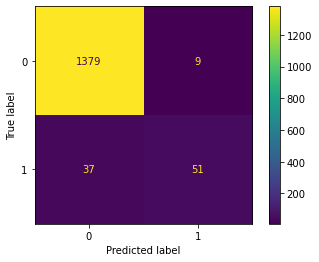

In [69]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg1, X_train_scaled, y_train)

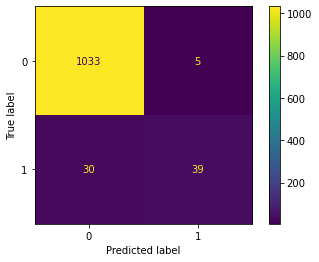

In [70]:
plot_confusion_matrix(logreg1, X_val_scaled, y_tr_val)

In [71]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2021)

In [72]:
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

In [73]:
logreg2 = LogisticRegression()

In [74]:
modeling_function(logreg1, X_train_res, y_train_res, X_val_scaled, y_tr_val)

Training accuracy_score:  0.8944524495677233
Validation accuracy_score:  0.9051490514905149
Training precision_score:  0.9046563192904656
Validation precision_score:  0.9046563192904656


LogisticRegression()

In [75]:
rf = RandomForestClassifier(random_state=2021)

In [76]:
modeling_function(rf, X_train_scaled, y_train, X_val_scaled, y_tr_val)

Training accuracy_score:  1.0
Validation accuracy_score:  1.0
Training precision_score:  1.0
Validation precision_score:  1.0


RandomForestClassifier(random_state=2021)

In [77]:
param_grid = {'n_estimators': [50, 75, 100],
              'max_depth': [20, 50, 75],
              'min_samples_leaf': [5, 10, 15],
              'criterion': ['gini', 'entropy'],
              'max_leaf_nodes': [5, 10, 15, 20],
              'n_jobs': [-1]}

In [78]:
rf_gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='f1')




In [79]:
rf_gs.fit(X_train_scaled, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=2021),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 50, 75],
                         'max_leaf_nodes': [5, 10, 15, 20],
                         'min_samples_leaf': [5, 10, 15],
                         'n_estimators': [50, 75, 100], 'n_jobs': [-1]},
             scoring='f1')

In [80]:
rf_model = rf_gs.best_estimator_

In [82]:
rf_gs.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 5,
 'n_estimators': 75,
 'n_jobs': -1}

In [81]:
modeling_function(rf_model, X_train_scaled, y_train, X_val_scaled, y_tr_val)




Training accuracy_score:  0.9728997289972899
Validation accuracy_score:  0.971093044263776
Training precision_score:  0.9444444444444444
Validation precision_score:  0.9444444444444444


RandomForestClassifier(max_depth=20, max_leaf_nodes=20, min_samples_leaf=5,
                       n_estimators=75, n_jobs=-1, random_state=2021)

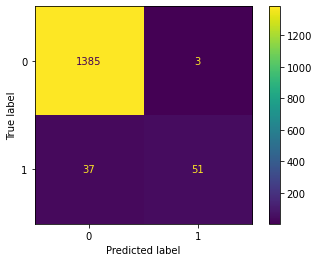

In [89]:
plot_confusion_matrix(rf_model, X_train_scaled, y_train)

In [83]:
rf2 = RandomForestClassifier(criterion='gini', random_state=2021)

In [84]:
param_grid2 = {'max_depth': [10, 15, 20, 25, 30],
               'n_estimators': [65, 70, 75, 80, 85],
              'min_samples_leaf': [3, 4, 5, 6, 7, 8],
              'max_leaf_nodes': [18, 20, 22, 25],
              'n_jobs': [-1]}

In [85]:
rf2_gs = GridSearchCV(estimator=rf2, param_grid=param_grid2, scoring='f1')



In [86]:
rf2_gs.fit(X_train_scaled, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=2021),
             param_grid={'max_depth': [10, 15, 20, 25, 30],
                         'max_leaf_nodes': [18, 20, 22, 25],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8],
                         'n_estimators': [65, 70, 75, 80, 85], 'n_jobs': [-1]},
             scoring='f1')

In [87]:
best_rf_model = rf2_gs.best_estimator_

In [88]:
modeling_function(best_rf_model, X_train_scaled, y_train, X_val_scaled, y_tr_val)



Training accuracy_score:  0.9728997289972899
Validation accuracy_score:  0.971093044263776
Training precision_score:  0.9615384615384616
Validation precision_score:  0.9615384615384616


RandomForestClassifier(max_depth=10, max_leaf_nodes=20, min_samples_leaf=5,
                       n_estimators=65, n_jobs=-1, random_state=2021)

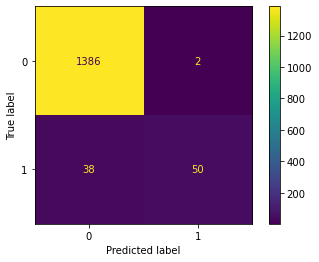

In [90]:
plot_confusion_matrix(best_rf_model, X_train_scaled, y_train)

In [91]:
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X.columns)

In [92]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test_imputed))



In [104]:
test_preds = best_rf_model.predict(X_test_scaled)

In [106]:
f1_score(y_test, test_preds)

0.8964769647696477

In [107]:
from sklearn.feature_selection import RFECV

In [108]:
selector = RFECV(estimator=best_rf_model, step=1, cv=5, scoring='f1')

In [109]:
selector.fit(X_train_res, y_train_res)

RFECV(cv=5,
      estimator=RandomForestClassifier(criterion='entropy', max_depth=10,
                                       max_leaf_nodes=25, min_samples_leaf=4,
                                       n_estimators=75, n_jobs=-1,
                                       random_state=2021),
      scoring='f1')

In [110]:
X_new = selector.transform(X_train_res)

In [111]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier())
